In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 2: Load Dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Step 3: Initial Inspection
print("Shape of dataset:", df.shape)
print("\nColumns and Data Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum())

# Display first 5 rows
df.head()


Shape of dataset: (8790, 10)

Columns and Data Types:

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

Missing Values:

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows where important values are missing
df.dropna(subset=['director', 'country'], inplace=True)

# Fill remaining nulls (if any)
df['rating'].fillna('Not Rated', inplace=True)

# Confirm changes
df.info()


Duplicate rows: 0

Missing values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686

C:\Users\user\AppData\Local\Temp\ipykernel_17888\856598411.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Not Rated', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_17888\992992058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


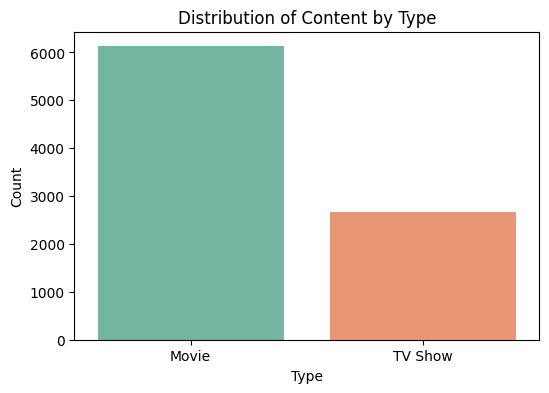

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\2883456906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


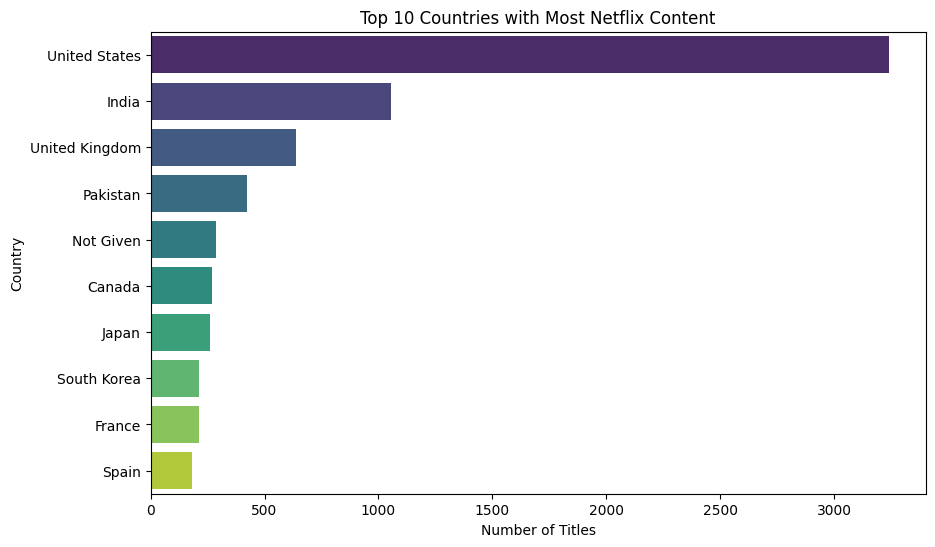

In [5]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\4065000614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')


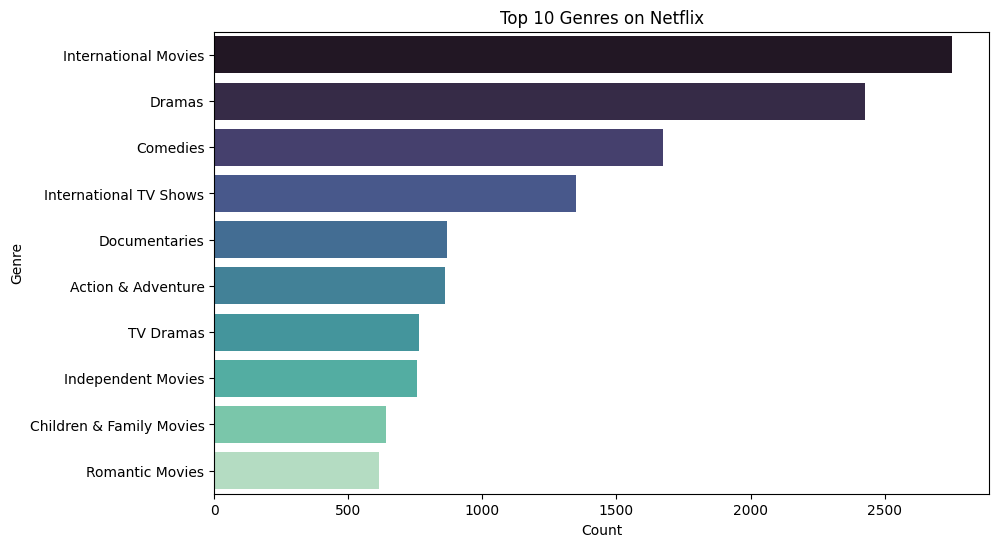

In [6]:
# Split genres and flatten the list
df['genres'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = sum(df['genres'], [])  # Flatten list of lists

# Get top 10 genres
import pandas as pd
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\1071261565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')


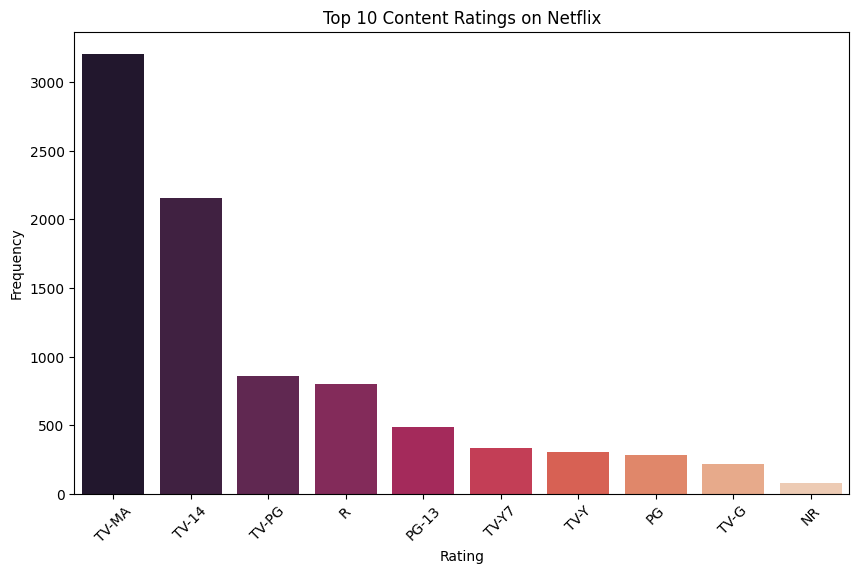

In [7]:
rating_counts = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\2019742446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='coolwarm')


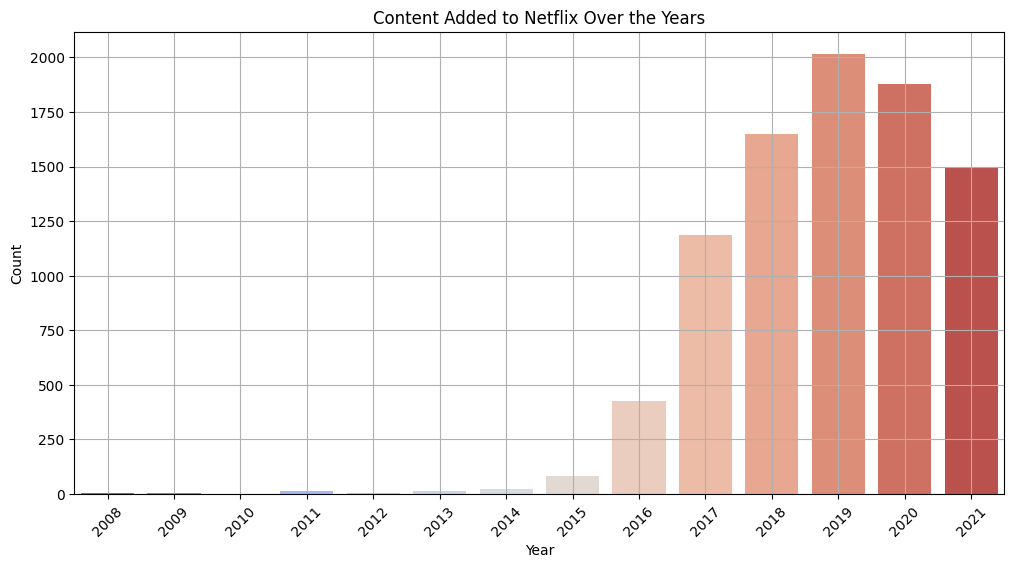

In [8]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', palette='coolwarm')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\2635864628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', palette='crest')


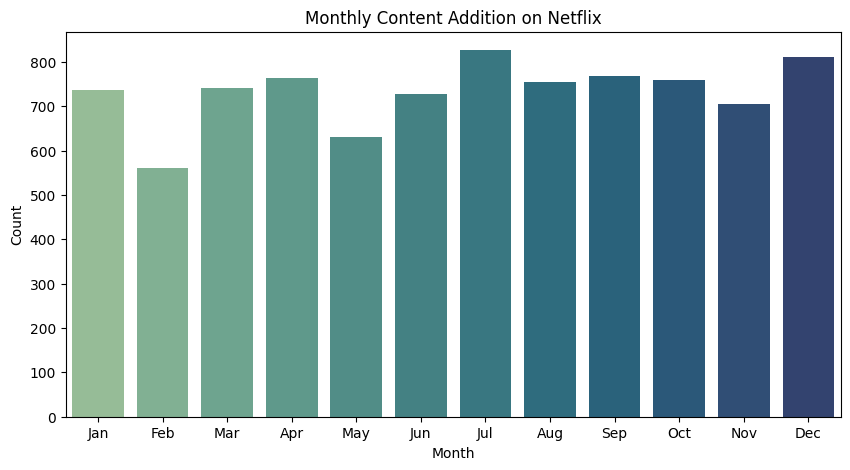

In [9]:
df['month_added'] = df['date_added'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month_added', palette='crest')
plt.title('Monthly Content Addition on Netflix')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


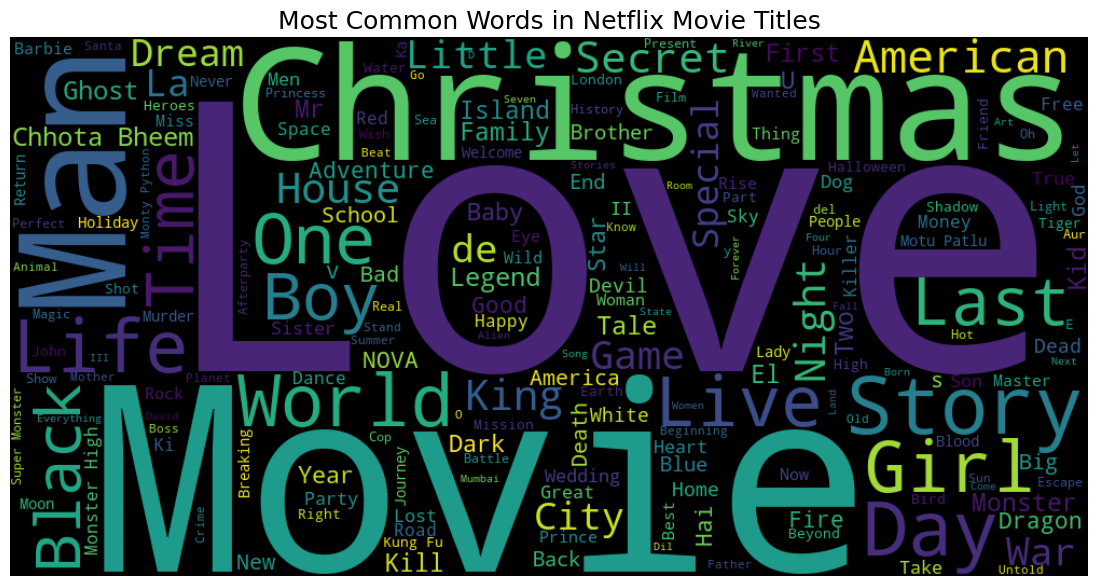

In [10]:
from wordcloud import WordCloud

# Filter movie titles only
movie_titles = df[df['type'] == 'Movie']['title'].dropna()

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(movie_titles))

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Movie Titles', fontsize=18)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\722073828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


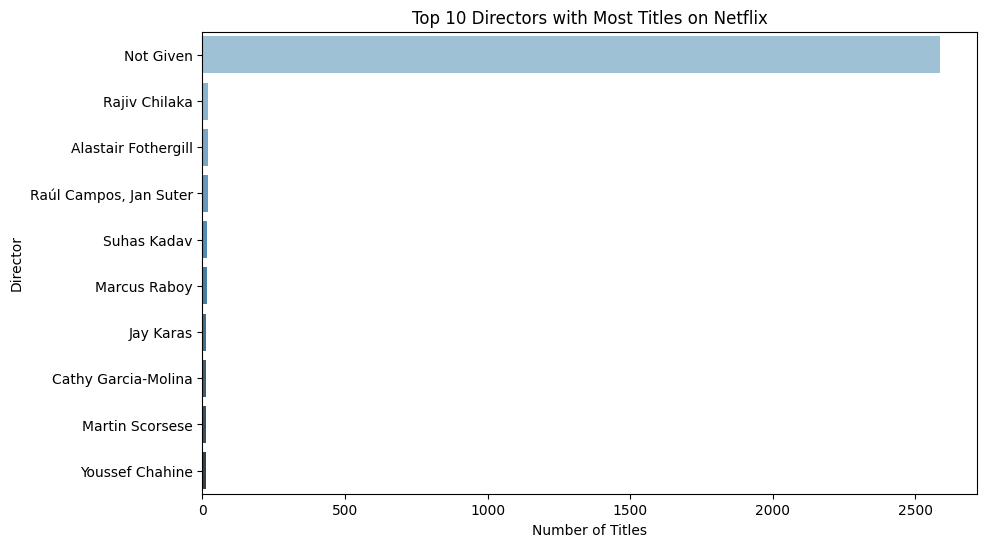

In [11]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17888\1396967940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genre_counts.values, y=movie_genre_counts.index, palette='pastel')


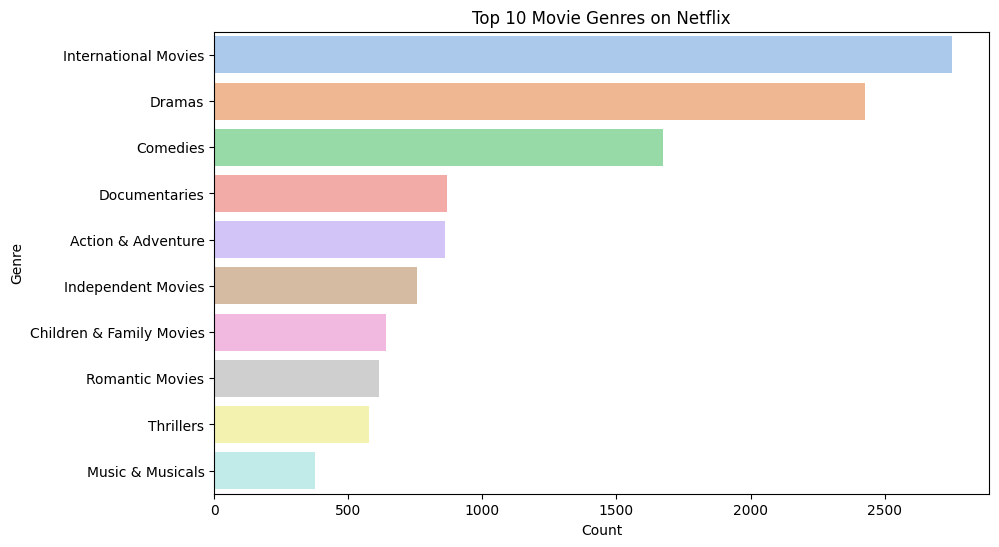

C:\Users\user\AppData\Local\Temp\ipykernel_17888\1396967940.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_genre_counts.values, y=tv_genre_counts.index, palette='muted')


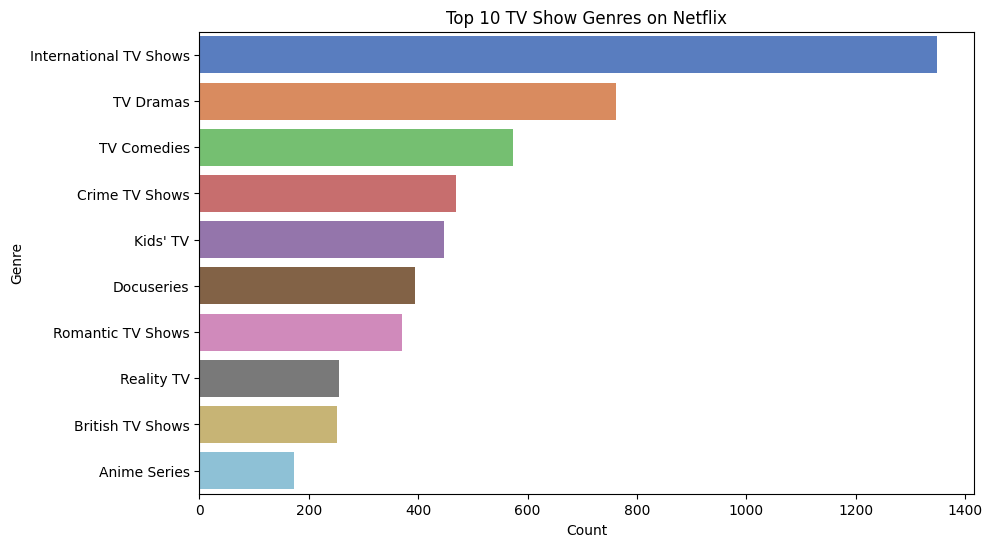

In [12]:
# Top genres for Movies
movie_genres = df[df['type'] == 'Movie']
movie_genre_counts = pd.Series(sum(movie_genres['genres'], [])).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_genre_counts.values, y=movie_genre_counts.index, palette='pastel')
plt.title('Top 10 Movie Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Top genres for TV Shows
tv_genres = df[df['type'] == 'TV Show']
tv_genre_counts = pd.Series(sum(tv_genres['genres'], [])).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=tv_genre_counts.values, y=tv_genre_counts.index, palette='muted')
plt.title('Top 10 TV Show Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [13]:
## 🎬 Genre-Based Recommendation System using NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [14]:
# Create a fresh dataframe for genre recommendation
df_genre = df[['title', 'listed_in']].dropna().drop_duplicates()

# Reset index
df_genre.reset_index(drop=True, inplace=True)

# Optional: Convert to lowercase (helps with consistency)
df_genre['title'] = df_genre['title'].str.strip()
df_genre['listed_in'] = df_genre['listed_in'].str.strip()


In [15]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transform the 'listed_in' (genre column)
tfidf_matrix = tfidf.fit_transform(df_genre['listed_in'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (8787, 44)


In [16]:
# Compute cosine similarity between all titles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [17]:
# Mapping from title to index
indices = pd.Series(df_genre.index, index=df_genre['title'].str.lower())


In [18]:
def recommend(title, top_n=5):
    title = title.lower()

    if title not in indices:
        return "❌ Title not found. Please check the spelling."

    idx = indices[title]

    # Get similarity scores for this title
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort titles by similarity score (excluding the same title itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get indices of the top similar titles
    recommended_indices = [i[0] for i in sim_scores]

    # Return the titles
    return df_genre['title'].iloc[recommended_indices].tolist()


In [19]:
print("Recommendations for Narcos:")
print(recommend("Narcos"))

print("\nRecommendations for Stranger Things:")
print(recommend("Stranger Things"))


Recommendations for Narcos:
['Queen of the South', 'Altered Carbon', 'Narcos: Mexico', 'Shooter', "Marvel's Jessica Jones"]

Recommendations for Stranger Things:
['Nightflyers', 'Stranger Things', 'Helix', 'Manifest', 'The OA']


In [20]:
df_genre['title'].sample(10)  # Show 10 random titles


1640    American Murder: The Family Next Door
8343                                 忍者ハットリくん
8312                               Lilyhammer
2026                            I Will Follow
3330             Luv Shuv Tey Chicken Khurana
779                           The Seventh Day
4887                               Fishpeople
5022                              Happy Times
6147            The Haunting of Molly Hartley
1350                     Isa Pa with Feelings
Name: title, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# Use selected features
df_ml = df[['type', 'release_year', 'rating', 'duration']].dropna()

# Convert duration to string
df_ml['duration'] = df_ml['duration'].astype(str)


In [23]:
# Initialize encoders
le_rating = LabelEncoder()
le_duration = LabelEncoder()
le_type = LabelEncoder()

# Apply encoding
df_ml['rating'] = le_rating.fit_transform(df_ml['rating'])
df_ml['duration'] = le_duration.fit_transform(df_ml['duration'])
df_ml['type_encoded'] = le_type.fit_transform(df_ml['type'])  # This is the target


In [24]:
# Define features and label
X = df_ml[['release_year', 'rating', 'duration']]
y = df_ml['type_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Model Accuracy: 0.9823663253697383

Classification Report:
               precision    recall  f1-score   support

       Movie       0.98      0.99      0.99      1238
     TV Show       0.98      0.96      0.97       520

    accuracy                           0.98      1758
   macro avg       0.98      0.98      0.98      1758
weighted avg       0.98      0.98      0.98      1758



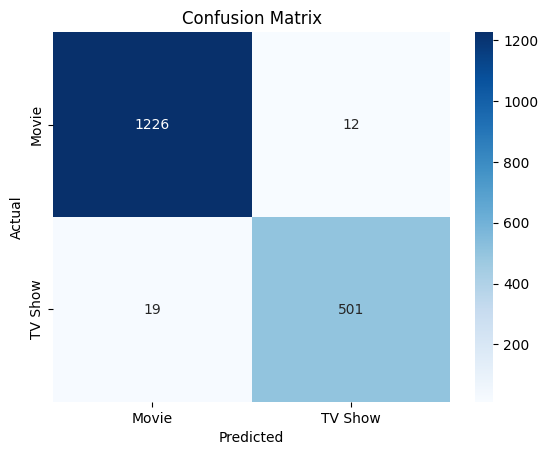

In [26]:
# Accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_type.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_type.classes_, yticklabels=le_type.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
# Export the cleaned DataFrame
df.to_csv("netflix_cleaned.csv", index=False)

print("File exported successfully!")


File exported successfully!


In [1]:
import pandas as pd
from collections import Counter
import re

# Load the cleaned Netflix dataset
df = pd.read_csv("netflix_cleaned.csv")

# Combine all titles into one string
titles = ' '.join(df['title'].dropna()).lower()

# Remove punctuation and split into words
words = re.findall(r'\b\w+\b', titles)

# Remove common stop words
stopwords = set([
    'the', 'of', 'and', 'a', 'in', 'to', 'on', 'for', 'with', 'at', 'by', 'an', 
    'be', 'is', 'this', 'that', 'it', 'as', 'from', 'you', 'i', 'my', 'me', 'we', 'our'
])
filtered_words = [word for word in words if word not in stopwords]

# Count word frequency
word_counts = Counter(filtered_words)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

# Save to CSV
word_freq_df.to_csv("common_words.csv", index=False)
